In [6]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#import scores and stadiums csv files as dataframe
scores_df=pd.read_csv('../project_one/Resources/spreadspoke_scores.csv')
stadium_df=pd.read_csv('../project_one/Resources/nfl_stadiums.csv', encoding="utf-8")

# Check the two dataframes
#scores_df.info()
#stadium_df.info()

FileNotFoundError: [Errno 2] No such file or directory: '../project_one/Resources/spreadspoke_scores.csv'

In [ ]:
# Merge scores and stadiums datframes

# The two daraframes have different columns names containg stadium names. Rename one so they match for merging
scores_df.rename(columns = {'stadium':'stadium_name'}, inplace = True)

# Merge two dataframes left on stadium_name
data_df=pd.merge(scores_df, stadium_df, how='left', on='stadium_name' )

#check the merged data
#data_df.info()

In [3]:
# Clean data

# Remove columns not being used for this project

# Define columns to be dropped
drop_list=['stadium_elevation', 
           'stadium_azimuthangle', 
           'stadium_weather_station_name',
           'stadium_weather_station',
           'stadium_weather_station_zipcode',
           'stadium_address',
           'stadium_close',
           'stadium_open',
           'over_under_line',
           'spread_favorite',
           'team_favorite_id',
            ]

# Drop the selected columns
data_df=data_df.drop(drop_list, axis='columns')

# Drop home/away, keep only neutral site games,  <- dataframe for Super Bowl question (Brian!!!!)
super_bowl_data_df=data_df.loc[data_df['schedule_week']=='Superbowl']

# Drop neutral site games, keep only home/away <- main dataframe for most questions
data_df=data_df.loc[data_df['stadium_neutral']==False]

# Drops NaNs in home and away scores
data_df.dropna(subset=['score_home'], inplace=True)
data_df.dropna(subset=['score_away'], inplace=True)

# Check the dataframe
#data_df.info()
#super_bowl_data_df.info()

NameError: name 'data_df' is not defined

In [4]:
# Check the dataframe to make sure columns were dropped
data_df.info()


NameError: name 'data_df' is not defined

In [5]:
# Add a empty column home_result
data_df["home_result"]=''

NameError: name 'data_df' is not defined

In [102]:
# Move new column over to be beside the home and away scores
data_df=data_df.iloc[:,[0,1,2,3,4,5,6,7,21,8,9,10,11,12,13,14,15,16,17,18,19,20]]

#Check coulmn has been added and is in the correct place
#data_df.info()

In [103]:
# Fill column home_result to show if home team won (W), lost (L) or tied (T) 
# based on relationship between home score and away score

home=data_df['score_home']
away=data_df['score_away']

data_df['home_result']=np.where(home > away, 'Win', 
                        np.where(home < away, 'Loss','Tie'))

#data_df['home_result'] = data_df.apply(lambda x:'Win' if x['score_home'] > x['score_away'] else "Loss or Tie",axis=1)

# Check 
data_df.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,home_result,stadium_name,...,weather_wind_mph,weather_humidity,weather_detail,stadium_location,stadium_type,stadium_weather_type,stadium_capacity,stadium_surface,stadium_latitude,stadium_longitude
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,Loss,Orange Bowl,...,6.0,71.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500,-80.316300
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,Win,Rice Stadium,...,7.0,70.0,NaN,"Houston, TX",outdoor,warm,NaN,Grass,NaN,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,Win,Balboa Stadium,...,7.0,82.0,NaN,"San Diego, CA",outdoor,warm,NaN,Grass,NaN,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,Loss,Orange Bowl,...,11.0,78.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500,-80.316300
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,Win,Lambeau Field,...,8.0,62.0,NaN,"Green Bay, WI",outdoor,cold,"80,735",Grass,44.501389,-88.062222


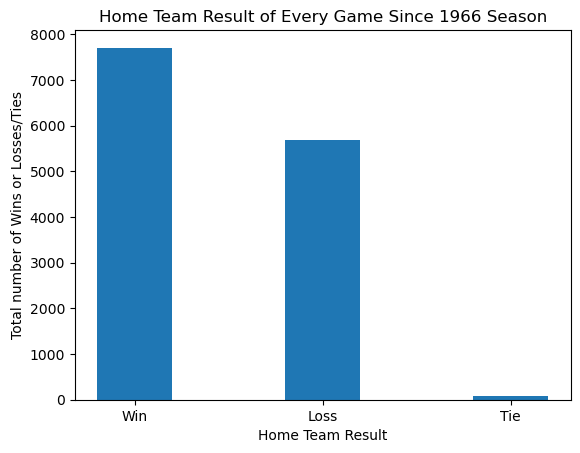

In [104]:
# Bar chart of total home wins and total losses/ties for entire dataset


# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(data_df['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

# Plot bar graph
plt.bar(result, counts, width = 0.4)

plt.xlabel('Home Team Result')
plt.ylabel('Total number of Wins or Losses/Ties')
plt.title("Home Team Result of Every Game Since 1966 Season")

plt.show()



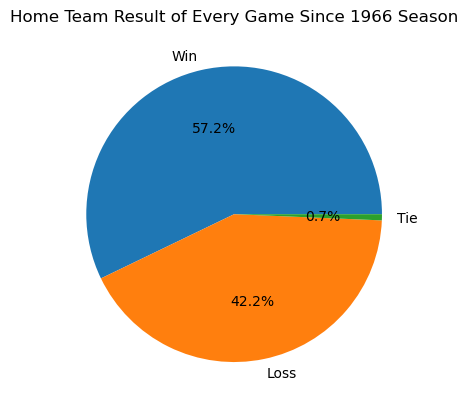

In [105]:
# Pie chart of total home wins and total losses/ties for entire dataset


plt.pie(counts, labels=result, autopct='%1.1f%%')


plt.title("Home Team Result of Every Game Since 1966 Season")

plt.show()

In [106]:
# Historical trend

# Count number of wins and losses overall

overall_win_count=data_df['home_result'].value_counts()['Win']
print(overall_win_count)
overall_loss_count=data_df['home_result'].value_counts()['Loss']
print(overall_loss_count)
overall_tie_count=data_df['home_result'].value_counts()['Tie']
print(overall_tie_count)

# This checks fine, 


7705
5687
90


In [107]:
# Get win, loss and tie counts when grouped by year

counts=pd.DataFrame(data_df.groupby(['schedule_season', 'home_result']).size())
counts.head()


0
schedule_season home_result    
1966            Loss         70
                Tie           9
                Win          91
1967            Loss         75
                Tie          11

<function matplotlib.pyplot.show(close=None, block=None)>

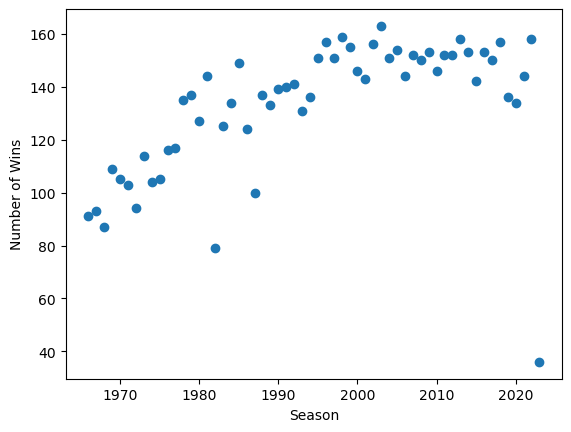

In [108]:
# Graph of wins vs year

# Filter out everything except Wins
win_data=data_df.loc[data_df['home_result']=='Win']

# Get win counts when grouped by year
win_counts=pd.DataFrame(win_data.groupby(['schedule_season']).size())


# Plot graph of wins vs year

x_axis=win_counts.index
y_axis=win_counts[0]

plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.scatter(x_axis, y_axis)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

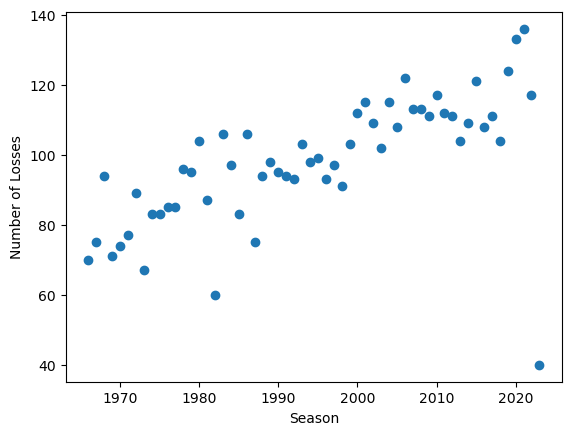

In [109]:
# Graph of losses vs year

# Filter out everything except Wins
loss_data=data_df.loc[data_df['home_result']=='Loss']

# Get win counts when grouped by year
loss_counts=pd.DataFrame(loss_data.groupby(['schedule_season']).size())


# Plot graph of wins vs year

x_axis=loss_counts.index
y_axis=loss_counts[0]

plt.xlabel('Season')
plt.ylabel('Number of Losses')
plt.scatter(x_axis, y_axis)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

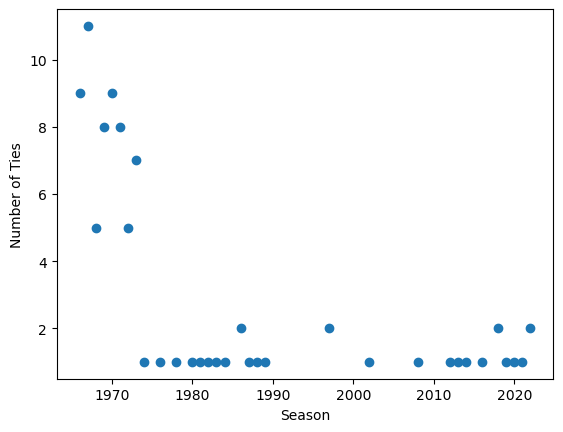

In [110]:
# Graph of ties vs year

# Filter out everything except Wins
tie_data=data_df.loc[data_df['home_result']=='Tie']

# Get win counts when grouped by year
tie_counts=pd.DataFrame(tie_data.groupby(['schedule_season']).size())


# Plot graph of wins vs year

x_axis=tie_counts.index
y_axis=tie_counts[0]

plt.xlabel('Season')
plt.ylabel('Number of Ties')
plt.scatter(x_axis, y_axis)
plt.show

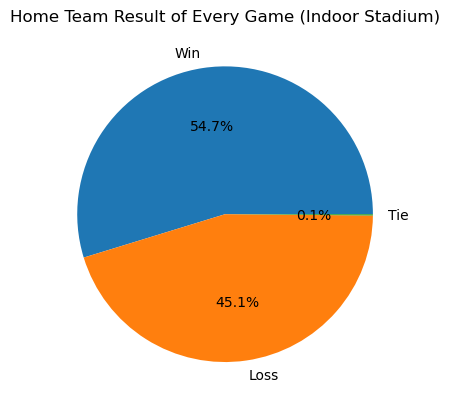

In [111]:
# Pie chart of total home wins and total losses/ties for indoor stadiums

# Filter entire dataset for indoor stadiums
indoor_data=data_df.loc[data_df['stadium_type']=='indoor']

# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(indoor_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Indoor Stadium)")

plt.show()


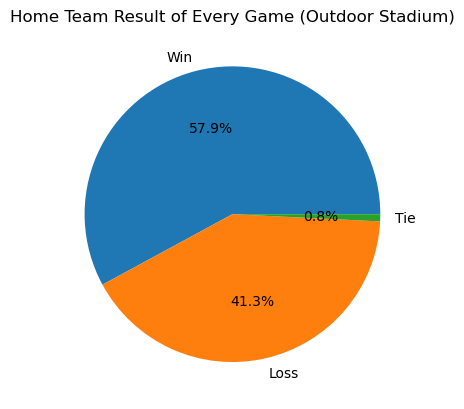

In [112]:
# Pie chart of total home wins and total losses/ties for outdoor stadiums

# Filter entire dataset for outdoor stadiums
outdoor_data=data_df.loc[data_df['stadium_type']=='outdoor']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(outdoor_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Outdoor Stadium)")

plt.show()


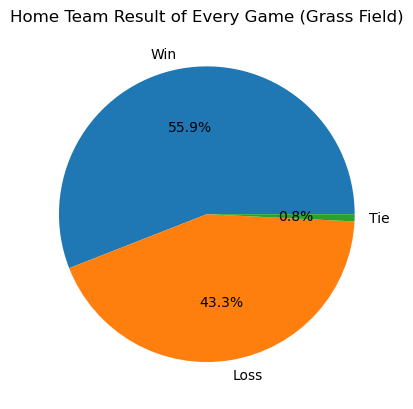

In [113]:
# Pie chart of total home wins and total losses/ties for grass field
# NaNs in stadium_surface column, lots of different names for brands of artifical turf!!!

# Filter entire dataset for grass surface
grass_data=data_df.loc[data_df['stadium_surface']=='Grass']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(grass_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Grass Field)")

plt.show()


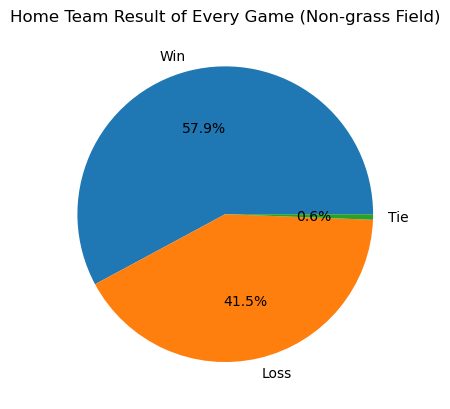

In [114]:
# Pie chart of total home wins and total losses/ties for non-grass field
# NaNs in stadium_surface column, lots of different names for brands of artifical turf!!!

# Filter entire dataset for non-grass surface
grass_data=data_df.loc[data_df['stadium_surface']!='Grass']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(grass_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Non-grass Field)")

plt.show()

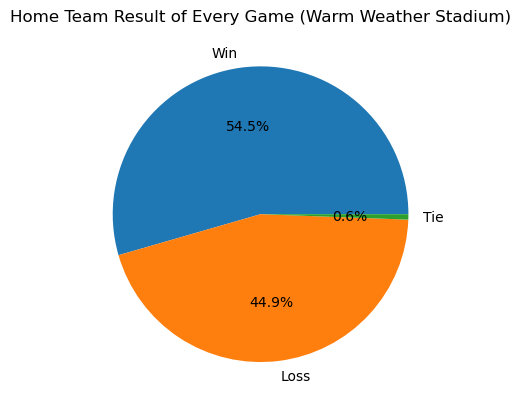

In [115]:
# Pie chart of total home wins and total losses/ties for "warm weather" stadiums


# Filter entire dataset for warm weather stadiums
warm_data=data_df.loc[data_df['stadium_weather_type']=='warm']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(warm_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Warm Weather Stadium)")

plt.show()

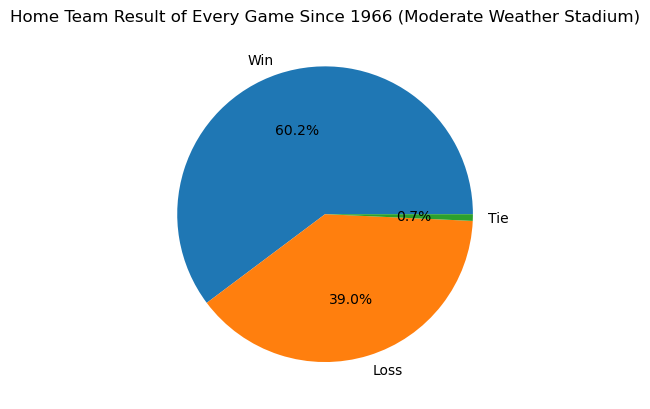

In [116]:
# Pie chart of total home wins and total losses/ties for "moderate weather" stadiums


# Filter entire dataset for warm weather stadiums
moderate_data=data_df.loc[data_df['stadium_weather_type']=='moderate']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(moderate_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game Since 1966 (Moderate Weather Stadium)")

plt.show()

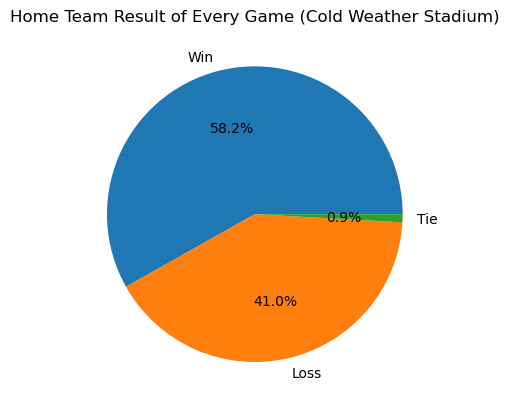

In [117]:
# Pie chart of total home wins and total losses/ties for "cold weather" stadiums


# Filter entire dataset for warm weather stadiums
cold_data=data_df.loc[data_df['stadium_weather_type']=='cold']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(cold_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']


plt.pie(counts, labels=result, autopct='%1.1f%%')
plt.title("Home Team Result of Every Game (Cold Weather Stadium)")
plt.show()